In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import string

In [4]:
import re

# Introduction

In [5]:
train = pd.read_csv('train.csv')

In [6]:
pd.options.display.max_colwidth=150

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [8]:
train.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [9]:
train['id'].value_counts().max()

1

In [10]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [11]:
train['label'].value_counts(normalize=True)

0    0.929854
1    0.070146
Name: label, dtype: float64

In [12]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [13]:
train.sample(10)

,id,label,tweet
2739,2740,0,we're to have mercedes with us tomorrow for some #corporategolf - we hope the #sun stays out!
12928,12929,0,it's all about the location location location #lovemyjob #nextplease
20409,20410,0,how to be happy with yourself? #happiness #selfrespect #respect #life #lifehacks #love #diy #blog #blogger âº .
29371,29372,0,adults from now on..ððð² #18 #2 #both #adults #from #now #fun #happiness #love #this #lifeâ¦
26914,26915,0,#healthandfitness attack bull game 3d: do you really think that his head was empty around the city. each s
24757,24758,0,"the galaxy will make you #laugh, #cry, #think, #motivate, #hungry, &amp; hopefully my friends want to spread the word."
18690,18691,0,can't wait for @user 's mass shooting aicle to be reposted for the umpteenth time... #pulsenightclubshooting #orlando
14272,14273,1,.@user you are a disgusting wohless pig of a human being...assuming you are human. go play in traffic.
26262,26263,0,gopro in place and ready to roll! ð #gopro #enduroriding #enduromode #filming #solo â¦
25508,25509,1,@user @user i've had these experiences in europe as an american. is alive and unwell.


# Data Cleaning

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
punctuation = string.punctuation

In [16]:
def clean_text(text):
    text_clean = []
    for i in text:
        if i not in punctuation:
            text_clean.append(i.lower())
    return ''.join(text_clean)

In [17]:
clean_text(train.iloc[14287, 2])

'relax relax relax enjoymylifeenjoylifeenjoyingenjoy sunnyfafasfenjoylife holiâ\x80¦ '

In [18]:
def clean_text(text):
    text_clean = re.findall(r'[a-zA-Z0-9\']+', text)
    return ' '.join(text_clean)

In [19]:
clean_text(train.iloc[14287, 2])

'relax relax relax enjoymylife enjoylife enjoying enjoy sunnyfafa sfenjoylife holi'

In [20]:
train['clean tweet'] = train['tweet'].apply(lambda x: clean_text(x))

In [21]:
train

,id,label,tweet,clean tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for lyft credit i can't use cause they don't offer wheelchair vans in pdx disapointed getthanked
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,ate user isz that youuu
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm shame imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",user sikh temple vandalised in in calgary wso condemns act


## counts

In [22]:
train['wordcount'] = train['clean tweet'].apply(lambda x: len(x.split()))

In [23]:
train['charcount'] = train['clean tweet'].apply(lambda x: len(x))

In [24]:
train['mentions'] = train['tweet'].apply(lambda x: x.count('@'))

In [25]:
train['hashtags'] = train['tweet'].apply(lambda x: x.count('#'))

In [26]:
train

,id,label,tweet,clean tweet,wordcount,charcount,mentions,hashtags
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,18,96,1,1
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for lyft credit i can't use cause they don't offer wheelchair vans in pdx disapointed getthanked,19,113,2,3
2,3,0,bihday your majesty,bihday your majesty,3,19,0,0
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model i love u take with u all the time in ur,12,45,0,1
4,5,0,factsguide: society now #motivation,factsguide society now motivation,4,33,0,1
...,...,...,...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,ate user isz that youuu,5,23,1,0
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm shame imwithher,23,126,0,2
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,listening to sad songs on a monday morning otw to work is sad,13,61,0,0
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",user sikh temple vandalised in in calgary wso condemns act,10,58,1,4


## Linguistic features

In [27]:
import spacy

In [28]:
nlp = spacy.load('en_core_web_sm')

In [29]:
p = nlp.analyze_pipes(pretty=True)


============================= Pipeline Overview =============================

#   Component         Assigns               Requires   Scores             Retokenizes
-   ---------------   -------------------   --------   ----------------   -----------
0   tok2vec           doc.tensor                                          False      
                                                                                     
1   tagger            token.tag                        tag_acc            False      
                                                                                     
2   parser            token.dep                        dep_uas            False      
                      token.head                       dep_las                       
                      token.is_sent_start              dep_las_per_type              
                      doc.sents                        sents_p                       
                                                       sents

In [30]:
def lemma(texts):
    lemma_list = []
    for doc in nlp.pipe(texts, n_process=2, batch_size=500, disable=['ner', 'tagger', 'parser', 'attribute_ruler']):
        tokens = [token.lemma_ for token in doc if token.is_stop==False]
        lemma_list.append(' '.join(tokens))
    return lemma_list

In [31]:
train['lemmas'] = lemma(train['clean tweet'].values)

In [32]:
def noun_count(texts):
    noun_list = []
    for doc in nlp.pipe(texts, n_process=2, batch_size=100, disable=['ner', 'parser', 'lemmatizer']):
        n = 0
        for token in doc:
            if token.pos_ == 'NOUN' or token.pos_ == 'PROPN':
                n += 1
        noun_list.append(n)
    return noun_list

In [33]:
train['nouncount'] = noun_count(train['clean tweet'].values)

In [34]:
def verb_count(texts):
    verb_list = []
    for doc in nlp.pipe(texts, n_process=2, batch_size=100, disable=['ner', 'parser', 'lemmatizer']):
        n = 0
        for token in doc:
            if token.pos_ == 'VERB':
                n += 1
        verb_list.append(n)
    return verb_list

In [35]:
train['verbcount'] = verb_count(train['clean tweet'].values)

In [36]:
def adjective_count(texts):
    adj_list = []
    for doc in nlp.pipe(texts, n_process=2, batch_size=100, disable=['ner', 'parser', 'lemmatizer']):
        n = 0
        for token in doc:
            if token.pos_ == 'ADJ':
                n += 1
        adj_list.append(n)
    return adj_list

In [37]:
train['adjcount'] = adjective_count(train['clean tweet'].values)

In [38]:
train

,id,label,tweet,clean tweet,wordcount,charcount,mentions,hashtags,lemmas,nouncount,verbcount,adjcount
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction run,18,96,1,1,user father dysfunctional selfish drags kids dysfunction run,5,1,2
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,user user thanks for lyft credit i can't use cause they don't offer wheelchair vans in pdx disapointed getthanked,19,113,2,3,user user thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked,8,4,0
2,3,0,bihday your majesty,bihday your majesty,3,19,0,0,bihday majesty,2,0,0
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,model i love u take with u all the time in ur,12,45,0,1,model love u u time ur,4,2,0
4,5,0,factsguide: society now #motivation,factsguide society now motivation,4,33,0,1,factsguide society motivation,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,ate user isz that youuu,5,23,1,0,ate user isz youuu,3,1,0
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm shame imwithher,23,126,0,2,nina turner airwaves trying wrap mantle genuine hero like shirley chisolm shame imwithher,9,3,1
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,listening to sad songs on a monday morning otw to work is sad,13,61,0,0,listening sad songs monday morning otw work sad,4,2,2
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",user sikh temple vandalised in in calgary wso condemns act,10,58,1,4,user sikh temple vandalised calgary wso condemns act,5,2,1


# train set Predictions

In [123]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay, DetCurveDisplay

In [40]:
from sklearn.utils import all_estimators

In [41]:
from scipy.sparse import hstack, csr_matrix

In [279]:
count = CountVectorizer(stop_words='english', min_df=2)

In [280]:
count_vectors = count.fit_transform(train['clean tweet'])

In [281]:
count_vectors

<31962x14648 sparse matrix of type '<class 'numpy.int64'>'
	with 211598 stored elements in Compressed Sparse Row format>

In [305]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

In [306]:
tfidf.fit(train['clean tweet'])

TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

In [307]:
tfidf_vectors = tfidf.transform(train['clean tweet'])

In [308]:
tfidf_vectors

<31962x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 410134 stored elements in Compressed Sparse Row format>

In [309]:
train.columns

Index(['id', 'label', 'tweet', 'clean tweet', 'wordcount', 'charcount',
       'mentions', 'hashtags', 'lemmas', 'nouncount', 'verbcount', 'adjcount'],
      dtype='object')

In [310]:
features = ['wordcount', 'charcount', 'mentions', 'hashtags', 'verbcount', 'nouncount', 'adjcount']

In [311]:
X = hstack([tfidf_vectors, csr_matrix(train[features])])

In [282]:
X = hstack([count_vectors, csr_matrix(train[features])])

In [312]:
target = train['label']

In [313]:
x_train, x_test, y_train, y_test = train_test_split(X, target, random_state=20, stratify=target)

In [314]:
model = LogisticRegression(max_iter=2000)

In [179]:
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.5)

In [315]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

In [316]:
cross_val_score(model, x_train, y_train, scoring='f1', cv=3)

array([0.42333786, 0.41331484, 0.37215909])

In [317]:
f1_score(y_train, model.predict(x_train))

0.5222984562607205

In [318]:
pred = model.predict(x_test)

In [319]:
f1_score(y_test, pred)

0.4688741721854304

In [291]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7430
           1       0.89      0.49      0.64       561

    accuracy                           0.96      7991
   macro avg       0.93      0.74      0.81      7991
weighted avg       0.96      0.96      0.95      7991



In [292]:
pred_prob = model.predict_proba(x_test)

In [293]:
pred_m = (model.predict_proba(x_test) >= .5).astype(int)

In [294]:
pred = pred_m[:, 1]

In [295]:
f1_score(y_test, pred)

0.6353211009174312

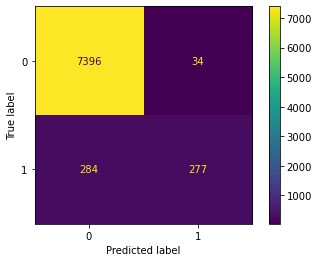

In [296]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

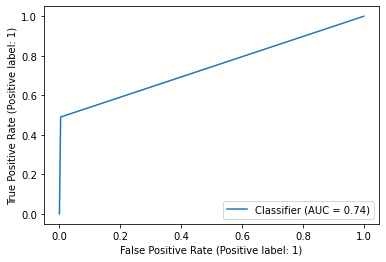

In [75]:
RocCurveDisplay.from_predictions(y_test, pred)

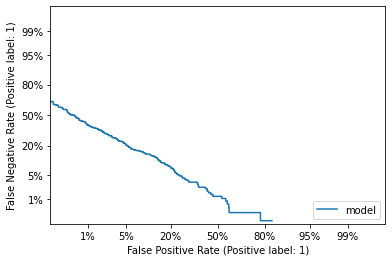

In [76]:
DetCurveDisplay.from_predictions(y_test.values, pred_prob[:, 1], name='model')

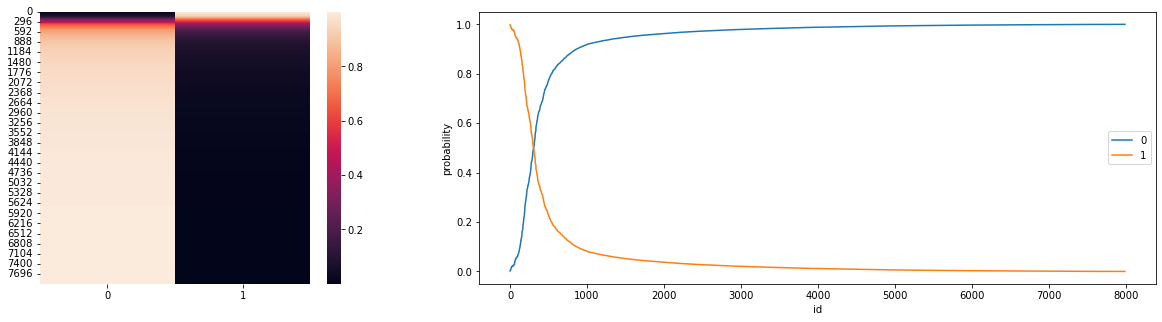

In [77]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5), gridspec_kw={'width_ratios': [1, 2]})
sns.heatmap(pred_prob[np.argsort(pred_prob[:, 0])], ax=ax1)
ax2.plot(pred_prob[np.argsort(pred_prob[:, 0])])
ax2.set_xlabel('id')
ax2.set_ylabel('probability')
ax2.legend(['0', '1'])

# test set

In [78]:
test = pd.read_csv('test.csv')

In [79]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"
...,...,...
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization"
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset"


In [80]:
test['clean tweet'] = test['tweet'].apply(lambda x: clean_text(x))

In [81]:
test

,id,tweet,clean tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,studiolife aislife requires passion dedication willpower to find newmaterials
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,user white supremacists want everyone to see the new birds movie and here s why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe ways to heal your acne altwaystoheal healthy healing
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",is the hp and the cursed child book up for reservations already if yes where if no when harrypotter pottermore favorite
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",3rd bihday to my amazing hilarious nephew eli ahmir uncle dave loves you and misses
...,...,...,...
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation trump uselections2016 leadership politics brexit blm gt 3
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling like a mermaid hairflip neverready formal wedding gown dresses mermaid
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",hillary campaigned today in ohio omg amp used words like assets amp liability never once did clinton say thee word radicalization
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happy at work conference right mindset leads to culture of development organizations work mindset


In [82]:
test['wordcount'] = test['clean tweet'].apply(lambda x: len(x.split()))

In [83]:
test['charcount'] = test['clean tweet'].apply(lambda x: len(x))

In [84]:
test['mentions'] = test['tweet'].apply(lambda x: x.count('@'))

In [85]:
test['hashtags'] = test['tweet'].apply(lambda x: x.count('#'))

In [86]:
test['lemmas'] = lemma(test['clean tweet'].values)

In [87]:
test['nouncount'] = noun_count(test['clean tweet'].values)

In [88]:
test['verbcount'] = verb_count(test['clean tweet'].values)

In [89]:
test['adjcount'] = adjective_count(test['clean tweet'].values)

In [90]:
test

,id,tweet,clean tweet,wordcount,charcount,mentions,hashtags,lemmas,nouncount,verbcount,adjcount
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦,studiolife aislife requires passion dedication willpower to find newmaterials,9,77,0,7,studiolife aislife requires passion dedication willpower find newmaterials,6,2,0
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why,user white supremacists want everyone to see the new birds movie and here s why,15,79,1,4,user white supremacists want new birds movie s,4,3,2
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!,safe ways to heal your acne altwaystoheal healthy healing,9,57,0,4,safe ways heal acne altwaystoheal healthy healing,3,1,3
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite",is the hp and the cursed child book up for reservations already if yes where if no when harrypotter pottermore favorite,21,119,0,3,hp cursed child book reservations yes harrypotter pottermore favorite,5,0,3
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦",3rd bihday to my amazing hilarious nephew eli ahmir uncle dave loves you and misses,15,83,0,2,3rd bihday amazing hilarious nephew eli ahmir uncle dave loves misses,7,1,3
...,...,...,...,...,...,...,...,...,...,...,...
17192,49155,thought factory: left-right polarisation! #trump #uselections2016 #leadership #politics #brexit #blm &gt;3,thought factory left right polarisation trump uselections2016 leadership politics brexit blm gt 3,13,97,0,6,thought factory left right polarisation trump uselections2016 leadership politics brexit blm gt 3,8,3,1
17193,49156,feeling like a mermaid ð #hairflip #neverready #formal #wedding #gown #dresses #mermaid â¦,feeling like a mermaid hairflip neverready formal wedding gown dresses mermaid,11,78,0,7,feeling like mermaid hairflip neverready formal wedding gown dresses mermaid,3,2,3
17194,49157,"#hillary #campaigned today in #ohio((omg)) &amp; used words like ""assets&amp;liability"" never once did #clinton say thee(word) #radicalization",hillary campaigned today in ohio omg amp used words like assets amp liability never once did clinton say thee word radicalization,21,129,0,5,hillary campaigned today ohio omg amp words like assets amp liability clinton thee word radicalization,12,3,1
17195,49158,"happy, at work conference: right mindset leads to culture-of-development organizations #work #mindset",happy at work conference right mindset leads to culture of development organizations work mindset,14,97,0,2,happy work conference right mindset leads culture development organizations work mindset,7,2,2


# test predictions

In [91]:
test_count_vectors = count.transform(test['clean tweet'])

In [236]:
test_tfidf_vectors = tfidf.transform(test['clean tweet'])

In [93]:
test_count_vectors

<17197x38763 sparse matrix of type '<class 'numpy.int64'>'
	with 113713 stored elements in Compressed Sparse Row format>

In [94]:
test.columns

Index(['id', 'tweet', 'clean tweet', 'wordcount', 'charcount', 'mentions',
       'hashtags', 'lemmas', 'nouncount', 'verbcount', 'adjcount'],
      dtype='object')

In [95]:
features = ['wordcount', 'charcount', 'mentions', 'hashtags', 'nouncount', 'verbcount', 'adjcount']

In [240]:
X_test = hstack([test_tfidf_vectors, csr_matrix(test[features])])

In [96]:
X_test = hstack([test_count_vectors, csr_matrix(test[features])])

In [97]:
predictions = model.predict(X_test)

In [98]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
test['id'].values

array([31963, 31964, 31965, ..., 49157, 49158, 49159], dtype=int64)

In [100]:
result = pd.DataFrame(predictions, test['id'].values).reset_index()
result.columns=['id', 'label']
result

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


In [101]:
result.to_csv(r'D:\engineering\CS\AI ML Blackbelt +\tests\twitter sentiments\submission1.csv', index=False)